# A Larger Dataset from Scratch

Created by Dr. Jie Tao, ver. 0.1

## What you need to know in this part
We are putting things together we learned in this course, and some other courses together. Specifically, these knowledge elements include:
- Pandas 
    - DataFrame Operations
    - Plotting
- Markdown
    - Express your analytical ideas
    - Explain your analysis
- Basic Descriptive Analysis from QA500
- Analytics Pipeline from BA500

## What you can do in this part
After completing this part, you should be able to:
- Create and lay out a new Jupyter Notebook
- Collaborate with your peers using Git/Github
- Use Pandas to load and manipulate a large dataset
- Use Dataframe operations to analyze the data
- Use Pandas plotting to plot key statistics

## Step 0: Work with Your Final Group 
Consider this part as the final tryout for the final projects, in a __much smaller__ scale. You should work with the same group of people as the final project.

## Step 1: Study Your Data
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Here is a data dictionary you can use to understand your data, which is available [here](https://www.kaggle.com/c/titanic/data) as well.

| Feature Name | Definition | Key |
| ------------ | ---------- | --- |
| survival | _Passenger survived or not_ | __0 = No, 1 = Yes__ |
| pclass | _Ticket Class_ | __1 = 1st, 2 = 2nd, 3 = 3rd__ |
| name | _Name of the passenger_ | ... | 
| sex | _Gender of the passenger_ | __male, female__ |
| age | _Age in Years_ | ... |
| sibsp | _# of siblings / spouses aboard the Titanic_ | ... |
| parch | _# of parents / children aboard the Titanic_ | ... |
| ticket | _Ticket number_ | ... |
| fare | _Passenger fare paid_ | ... |
| cabin | _Cabin number_ | ... |
| embarked | _Port of Embarkation_ | __C = Cherbourg, Q = Queenstown, S = Southampton__ |

There are some additional notes for these variables that maybe helpful:

- __pclass__: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- __age__: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

- __sibsp__: This feature defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- __parch__: This feature defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.

### YOUR TURN HERE
Write a short paragraph here to explain how do you plan to use the data. Specifically, you need to come up with at least 2 _interesting_ __analytical questions__. Also, include a _third_ analytical question for __next steps__ (things you can not do now but plan to do in the future, maybe due to the limitations of time/data/technique). Do not forget mention __how other people should care about your analysis__.

Here are some example questions:
1. Do wemen have a better chance to survive?
2. Do 1st-class passengers have a better chance to survive?

Please do not use these questions directly, come up with something new.

__NOTE:__ you should follow the same structure for your final project

__Your Analytical Questions below: __

By putting the Titanic data into visualizations, we hope to see if we can find any correlations between deaths and survival onboard the ship. This will be made easier by cleaning the dataframe, creating new columns where they are needed, and analyzing the statistics in the overall graph before we begin. Below are two analytical questions we are focusing to answer through this analysis, along with a problem we hope to answer in the future through the collection of more data and understanding of the dataset we have...

1. Is there any correlation between traveling alone or with a family, sex and survival?
2. Does the port the passengers embarked on have any relation to death and survivals?
3. (Future question) - Out of all these deaths, how many nanny's died who were onboard taking care of children in relevance to mothers of children?

Secondly, the `titanic.csv` file contains all the data you need to use. Let's first load the data in. The DataFrame holding the data should be named as `source_data`.

In [161]:
# DO NOT CHANGE THIS CODE BLOCK
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

### Load the Data
Hint - you may want to set `PassengerId` as the index of the DataFrame, you can do above by using the `index_col=` argument in `pd.read_csv`.

In [162]:
## Write your code to load the data

# Load data and set index

source_data = pd.read_csv('titanic.csv', index_col='PassengerId')

### Take the first look at your data

After loading your data, it is most important to see if the data is loaded as expected, you should at least look at _a few rows_ in `source_data`.

In [163]:
## write your code here
source_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You should also check how much data are your playing with, in terms of how many instances (rows) and features (columns).

In [164]:
## write your code here
source_data.info()
source_data.shape 

# 891 rows, 11 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


(891, 11)

### Determining how much data is missing
The next step is to check how much data is missing - maybe show them in ratio?

In [165]:
## Write your code here
source_data.isna().sum()

# 177 missing in Age
# 687 missing in Cabin
# 2 missing in Embarked

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [166]:
# ratios of missing data
# 19.87% missing from age, 77% missing from cabin, and .22% missing from embarked

(source_data.isna().sum()/source_data.shape[0]).round(4) * 100

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

If a column/feature contains more than __50%__ missing, we will drop it in this analysis.

In [167]:
## write your code here
# 77% missing from cabin
# drop cabin

(source_data.isna().sum()/source_data.shape[0]).round(4) * 100
source_data.drop('Cabin', axis=1, inplace=True) # add inplace=True to delete the column completely (wont show up next time df is printed)

If a column contains less that __50%__ missing, you shoud consider impute it.
- If the feature is __continuous__, you should consider using the _mean/median_;
- If it is __categorical__, you shoud consider using the _mode_.

Create new columns for imputed features. For instance, if the original feature is named `x`, your imputed feature should be `x_imputed`.

In [168]:
# calculate the mean age to confirm when added to the data
source_data['Age'].mean()

29.69911764705882

In [169]:
## write your code here
# we use the mean to replace missing values in age

source_data['age_imputed'] = source_data.Age.fillna(source_data.Age.mean())
source_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_imputed
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0


In [170]:
# we use the mode to replace missing values in embarked
# error faced: formula is different than the previous mean formula
# used stackoverflow.com to compute the code for mode

source_data['embarked_imputed'] = source_data['Embarked'].fillna(source_data['Embarked'].mode()[0])
source_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_imputed,embarked_imputed
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,S


In [171]:
# Confirm the new columns for age and embarked do not have missing data

(source_data.isna().sum()/source_data.shape[0]).round(4) * 100

Survived             0.00
Pclass               0.00
Name                 0.00
Sex                  0.00
Age                 19.87
SibSp                0.00
Parch                0.00
Ticket               0.00
Fare                 0.00
Embarked             0.22
age_imputed          0.00
embarked_imputed     0.00
dtype: float64

### Check your data types
You should always check the data types after loading the data. First, check the data types (you can use `.dtypes` or `.info()`.

In [172]:
## Write your code here
# view the datatypes with .dtypes

source_data.dtypes

Survived              int64
Pclass                int64
Name                 object
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Embarked             object
age_imputed         float64
embarked_imputed     object
dtype: object

If you see anything not correct above, you should fix it below. Otherwise, write a comment to yourself stating __all data types are correct__.

In [173]:
## Write your code here
# All data types are correct

## Step 2: Descriptive Stats

No matter what analytical questions you try to develop/answer, there are some basic statistical questions you need to answer. 

These descriptive statistical analysis can help you gain more insights about your data, to further/tweak your main analytical questions.

### Overall descriptive Stats

For any DataFrame, we should consider look at the generic descriptive statistics, such as _mean_, _median_, _# of unique values_, _standard deviation_, ...

`Pandas` provides a method for that.

In [174]:
## Write your code here
source_data.describe(include='all')

# Interesting findings:
    # mean: the average age is 29.7
    # top: there are more males onboard than females

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_imputed,embarked_imputed
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,889,891.000000,891
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3,NaN,3
top,NaN,NaN,"Montvila, Rev. Juozas",male,NaN,NaN,NaN,1601,NaN,S,NaN,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644,NaN,646
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,29.699118,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,13.002015,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,0.420000,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,22.000000,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,29.699118,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,35.000000,NaN


In [175]:
# Find the median of the columns of the dataframe

source_data.median()

# Median age is the same as average age

Survived        0.000000
Pclass          3.000000
Age            28.000000
SibSp           0.000000
Parch           0.000000
Fare           14.454200
age_imputed    29.699118
dtype: float64

In [176]:
# include the strings in .describe ... include='O'

source_data.describe(include='O')
    # Most people were embarked from S port

,Name,Sex,Ticket,Embarked,embarked_imputed
count,891,891,891,889,891
unique,891,2,681,3,3
top,"Montvila, Rev. Juozas",male,1601,S,S
freq,1,577,7,644,646


### How many survived?

First thing you may want to know is how many have survived, maybe through a bar chart comparison?

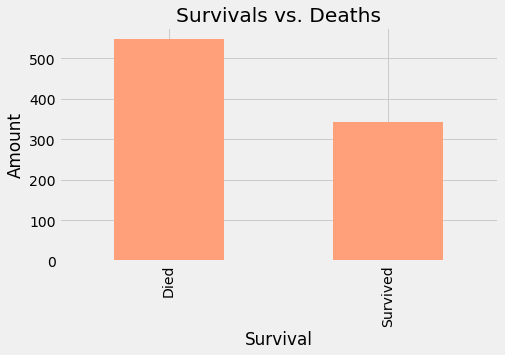

In [177]:
## Write your code here
# make bar plot to compare deaths to survivals

# rename 0 and 1 to Died and Survived to understand more easily
names = {0: 'Died', 1: 'Survived'}
source_data['Survived'] = source_data['Survived'].map(names)

survived_bar = source_data['Survived'].value_counts().plot(kind='bar',color='lightsalmon',figsize=(7,4))
survived_bar.set(xlabel='Survival',ylabel='Amount',title='Survivals vs. Deaths')
plt.show()

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

The above graph proves that there were many more deaths than survivals from the Titanic, almost double the amount of people died.


### How many male vs. female?
Gender (`sex`) is another important feature to group your instances. You may want to check the distribution as well.

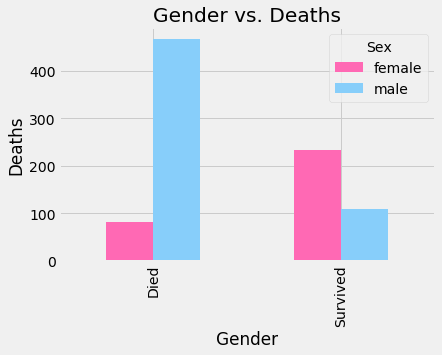

In [178]:
## Write your code here
import numpy as np
 # use double bar plot to visualize males vs female more easily
survived_bar = source_data.groupby(['Survived','Sex']).size().unstack().plot(kind='bar',color=['hotpink','lightskyblue'])
survived_bar.set(xlabel='Gender',ylabel='Deaths',title='Gender vs. Deaths')

plt.show()

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

A much larger amount of men died than women, and more women survived than men.


### Different classes
Look at the distribution of different classes are also important.

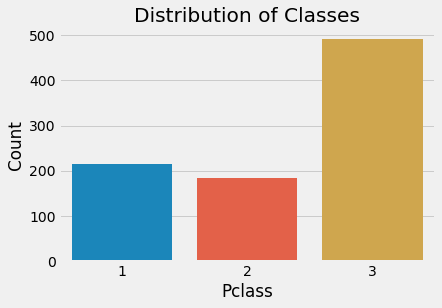

In [180]:
## Write your code here
import seaborn as sns
# bar plot to show each class
count, ax = plt.subplots()
ax = sns.countplot('Pclass', data=source_data)
ax.set_title('Distribution of Classes')
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')
plt.show()

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

The greatest amount of passengers were in class 3. Both class 1 and 2 combined do not add up to class 3.

### How is age distributed?

Looking at the age distribution of the passengers may also be useful.

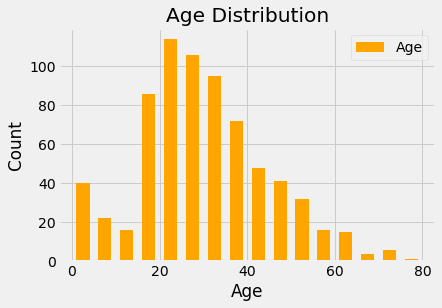

In [182]:
## Write your code here
# bin the ages into groups
# use a histogram with these bins to visualize the age frequency

age=source_data[['Age']].plot(kind='hist',bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80],rwidth=0.6,facecolor='orange')
age.set(xlabel='Age',ylabel='Count',title='Age Distribution')
plt.show()

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

The most common age group is between 20 and 30 years old.

### How is fare distributed?

Looking at the fare distribution of the passengers may also be useful.

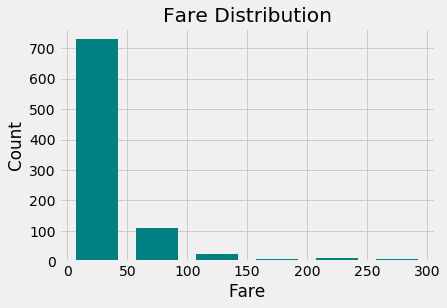

In [183]:
## Write your code here
# bin the fare  and create a histogram for the best visualization

Fare=source_data['Fare'].plot(kind='hist', bins=[0,50,100,150,200,250,300],rwidth=0.7, color='teal')
Fare.set(xlabel='Fare',ylabel='Count',title='Fare Distribution')
plt.show()

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

The majority of fares were between 0 and 50.

## Step 3: Feature Transformation/Creation

In your analysis, you may need to create some addtional features/columns to further support it. 

Here, we are going to create a few features.

### Creating age group

Grouping age into a categorical feature is always a good strategy to deal with your data. In this analysis, we treat the age grouping use the following logic:

```python
if age < 21:
    'child'
elif age > 60:
    'elder'
else:
    'adult'
```

You should call the new column as `Age_group`.

In [185]:
# https://www.datacamp.com/community/tutorials/categorical-data
# .where is used like an if statement 

source_data['Age_group'] = np.where(source_data.Age<21,'child', np.where(source_data.Age>60,'elder', 'adult'))
source_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_imputed,embarked_imputed,Age_group
PassengerId,,,,,,,,,,,,,
1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,S,adult
2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,C,adult
3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,S,adult
4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,S,adult
5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,S,adult


### Create family and travel_alone

In this dataset, we have two features modeling _family_: `sibsp` and `parch`. Maybe in the analysis we only care about if the passenger is traveling alone or not.

The logic is as following:
1. we are going to combine `sibsp` and `parch` as a new column `family` - just adding them up;
2. create a new column `travel_alone` with the following logic:
```python 
if family == 0:
    'alone'
else:
    'family'
```
Don't forget to test if the calculation is correct.

In [186]:
## write your code here
# add column as a formula of sibsp and parch

source_data['Family'] = source_data['SibSp'] + source_data['Parch']

In [187]:
# if statement (.where())

source_data['Travel_alone'] = np.where(source_data.Family==0, 'alone', 'family')
source_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_imputed,embarked_imputed,Age_group,Family,Travel_alone
PassengerId,,,,,,,,,,,,,,,
1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,S,adult,1,family
2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,C,adult,1,family
3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,S,adult,0,alone


You should create additional features if needed.

## Step 4: Answer Your Analytical Question

Since we have gained enough understanding of the dataset, now we can move forward toward the analytical questions you defined earlier. _Do not hesitate to change your analytical question if needed._

__You should break down this step based on your analytical questions. __

Below is some example I try to answer my example analytical questions.

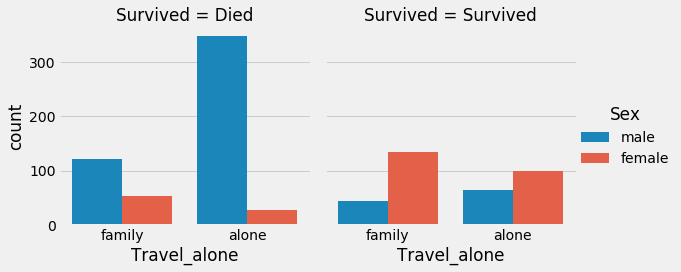

In [189]:
# was there a correlation between traveling alone or with a family, sex and survival
# need two graphs for death and survival to visaualize more easily
# easier to read in 2 seperate graphs than a double bar with more categories

sex_travel_death = sns.catplot(x="Travel_alone", hue="Sex", col="Survived", data=source_data, kind="count", height=4)
plt.show()

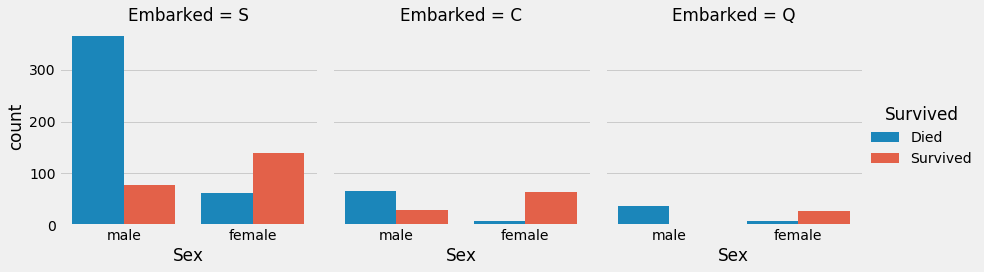

In [192]:
# Does the port the passengers embarked on have any relation to death and survivals?
# used similar visualization as previous graphs
# added another graph and the bars represent survival 

sex_embarked_death = sns.catplot(x="Sex", hue="Survived", col="Embarked", data=source_data, kind="count", height=4)
plt.show()

### What can be learned - This is required for all your analytical questions

Based on above visualization, it is clear that the _survival rate_ of _female_ passengers are much higher (>70%). 

Based on the lower visualization, it is clear that in terms of the absolute number, female passengers survived more than male ones, despite the larger number of male passengers on the Titanic.

These findings possibly suggest that the passengers on the Titanic are very __chivalrous__.

### Start Your Own Analysis

Now you can start your own analysis below.

__Is there any correlation between traveling alone or with a family, sex, and survival?__ According to our analysis, the majority of deaths were of men who traveled alone, and the highest survivals were of women who traveled with a family. As seen in our bar plot visualzation, more women survived than men in both travel categories, and more men died than women in both travel categories.

__Does the port the passengers embarked on have any relation to death and survivals?__ As seen in our three double bar plot visualizations categorized into the ports the passengers embarked, the majority of deaths were in passengers who emabarked the ship from Southampton (S). This visualization also shows that more women survived than men in all three embarkment locations. It is also interesting that no men who embarked from Queenstown (Q) port survived.

### What can you learn from your analysis, in response toward your analytical question?

The men onboard the Titanic put the womens lives first for survival, the majority of deaths were in men traveling alone. The port the passengeres embarked from also does not affect the higher death rate of men over women, it proved that more men died than women in all three of the ports. This analysis indicates that the men put the lives of the women before themselves. 

## Step 5: Next Steps and Wrap Up

In this section, you should discuss the next steps of the analysis. The next steps should be very relevant to the dataset (and your analytical questions), but might not be feasible because of the time/data/technique constraints.

### An Example Next Step

Based on my analytical questions, a natural next step is to analyze how can we use these features (including `Sex`, `Age_group`, ...) to __predict__ whether a passenger would survive or not. This would be the best extension of the analysis I have done so far. However, due to the data limitation (missing a _testing_ dataset to evaluate the predictive model(s)), and the limitations of the predictive modeling techniques (which I will learn in BA 545 next semester), they are not feasible at this point

##### Next Steps

Provide your next steps here.

To wrap up, you should provide a few things, including __lessons learned__ and __technical challenges__. These parts are _optional_ in this analysis, but are __required__ in your final project.

- __lessons learned__: these are the generic lessons you have learned in the analysis, such as how to write proper python code (for different analytical purposes), how to write up your analytical results, etc.
- __technocal challenges__: during your analysis, you must have encountered and overcame some technical challenges, such as questions in writing code/handling errors, ...

Writing these two parts would help you further your understanding toward data analysis.

#### __Our Next Steps:__

Based upon this analysis, it is clear that more data could help create a better understanding of any correlations between survival rates of passengers onboard the Titanic.  

- __lessons learned__: I learned how to alternate between dataframes in order to create the best visualization for the data. I also learned how to use '.where()' in numpy order to create new columns in relation to certain variables.
- __technocal challenges__: A few technical challenges we faced were how to include the strings in .describe, how to create a new column of string using a conditional, and how to fill NaN's with the mode of the column.

### Wrapping Up

Good job!

In this part, you have completed some _descriptive analyses_ using a famous dataset from scratch. This is a __preview__ of your final project, and you should consider using this notebook as a _template_ for your final project analysis.